In [1]:
#import librabries
import pandas as pd
import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create

In [2]:

#read the data 
dataset = pd.read_csv(r"C:\\Users\\SanelisoMzwakali\\Documents\\Movie correlatio\\movies.csv\movies.csv")


In [3]:
#lets look at data
dataset.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
#Look for any missing data

for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
#Data types for the columns
dataset.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Replace NaN Values with Zeros 
dataset['budget'] = dataset['budget'].replace(np.nan, 0)
dataset['gross']  = dataset['gross'].replace(np.nan, 0)

In [7]:
#Change data type
dataset['budget']=dataset['budget'].astype('int64')
dataset['gross']=dataset['gross'].astype('int')
dataset['released']=dataset['released'].astype('str')

In [8]:
#create correct year column
#dataset['yearcorrect']=dataset['released'].astype(str).str[7:4]
#dataset

In [9]:
dataset=dataset.sort_values(by=['gross'], inplace=False, ascending=False)

In [10]:
#Display all rows
pd.set_option('display.max_rows',None)

In [11]:
#drop any duplicates
dataset['company'].drop_duplicates()

6663                                            Lucasfilm
7244                                       Marvel Studios
7480                                 Walt Disney Pictures
6653                                   Universal Pictures
7494                        Walt Disney Animation Studios
5845                                         Warner Bros.
7072                                     Mandeville Films
6688                           Illumination Entertainment
4245                                      New Line Cinema
7458                                    Columbia Pictures
5878                                   Paramount Pictures
6059                            Metro-Goldwyn-Mayer (MGM)
7488                              Pixar Animation Studios
6905                               Fairview Entertainment
4476                                  Dreamworks Pictures
7246                                Twentieth Century Fox
5539                      Twentieth Century Fox Animation
6665          

In [12]:
dataset.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  
6663  2069521700             Lucasfilm    138.0  
7244  2048359754        Marvel Studios    149.0  
7480  1670727580  Walt Disney Pictures    118.0  
6653  1670516444    Universal Pictures    124.0  
6043  1518815515        Marvel Studios    143.0

In [13]:
#Budget high correlation 
#Company high correlation

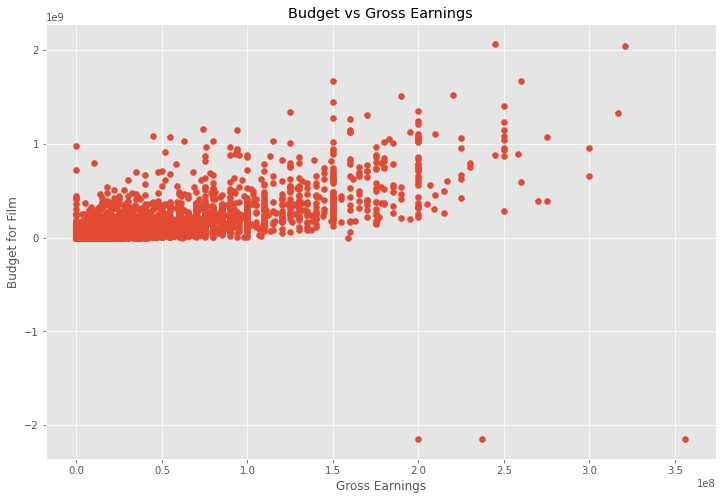

In [14]:
#Scatter plot with Budget vs Gross

plt.scatter(x=dataset['budget'], y=dataset['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [15]:
dataset.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  
6663  2069521700             Lucasfilm    138.0  
7244  2048359754        Marvel Studios    149.0  
7480  1670727580  Walt Disney Pictures    118.0  
6653  1670516444    Universal Pictures    124.0  
6043  1518815515        Marvel Studios    143.0

<AxesSubplot:xlabel='budget', ylabel='gross'>

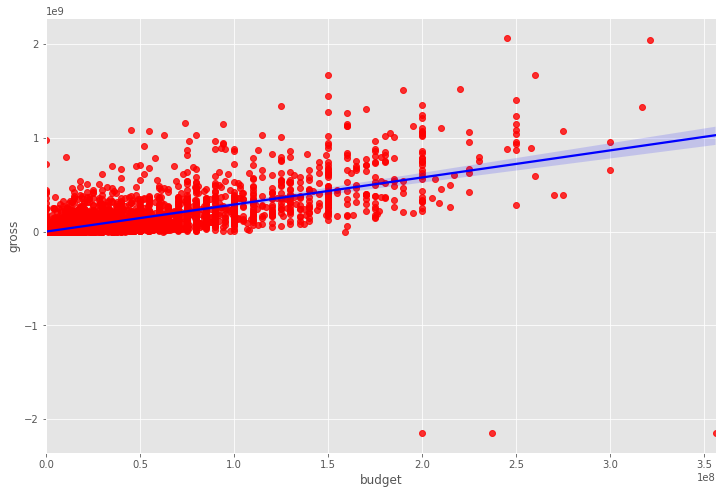

In [16]:
#Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=dataset, scatter_kws={"color": "red"},line_kws={"color":"blue"})

In [17]:
# Let's start looking at correlation
#https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/

In [18]:
dataset.corr(method='kendall') #kendall, pearson, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.209304  0.215943  0.097184
score    0.067652  1.000000  0.300115 -0.005194  0.089155  0.283611
votes    0.331465  0.300115  1.000000  0.439902  0.558565  0.198240
budget   0.209304 -0.005194  0.439902  1.000000  0.540326  0.176016
gross    0.215943  0.089155  0.558565  0.540326  1.000000  0.175355
runtime  0.097184  0.283611  0.198240  0.176016  0.175355  1.000000

In [19]:
#high correlation between budget and gross
#

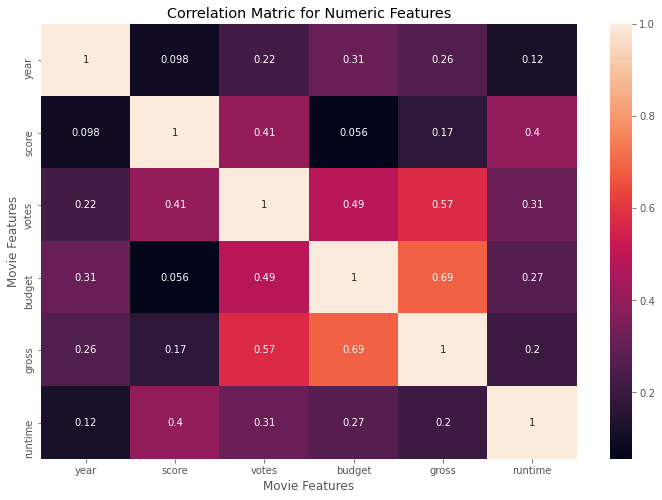

In [20]:
correlation_matrix = dataset.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
#Look at companies
dataset.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  
6663  2069521700             Lucasfilm    138.0  
7244  2048359754        Marvel Studios    149.0  
7480  1670727580  Walt Disney Pictures    118.0  
6653  1670516444    Universal Pictures    124.0  
6043  1518815515        Marvel Studios    143.0

In [22]:
dataset_numerized = dataset
for col_name in dataset_numerized.columns:
    if(dataset_numerized[col_name].dtype=='object'):
        dataset_numerized[col_name] =  dataset_numerized[col_name].astype('category')
        dataset_numerized[col_name] =  dataset_numerized[col_name].cat.codes
        
dataset_numerized

name  rating  genre  year  released  score      votes  director  writer  \
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      2620    7.7   495000.0       679    4052   
6311  1551       4      2  2013      1599    7.3   377000.0      2237     758   
6905  6108       4      1  2016        72    7.4   264000.0      1455    2362   
7051  2956       5      0  2017      

In [23]:
dataset.head()

name  rating  genre  year  released  score      votes  director  writer  \
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   

      star  country     budget       gross  company  runtime  
6663   524       55  245000000  2069521700     1540    138.0  
7244  2241       55  321000000  2048359754     1606    149.0  
7480   676       55  260000000  1670727580     2316    118.0  
6653   437       55  150000000  1670516444     2281    124.0  
6043  2241       55  220000000  1518815515     1606    143.0

In [24]:
dataset_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   

      star  country     budget       gross  company  runtime  
6663   524       55  245000000  2069521700     1540    138.0  
7244  2241       55  321000000  2048359754     1606    149.0  
7480   676       55  260000000  1670727580     2316    118.0  
6653   437       55  150000000  1670516444     2281    124.0  
6043  2241       55  220000000  1518815515     1606    143.0

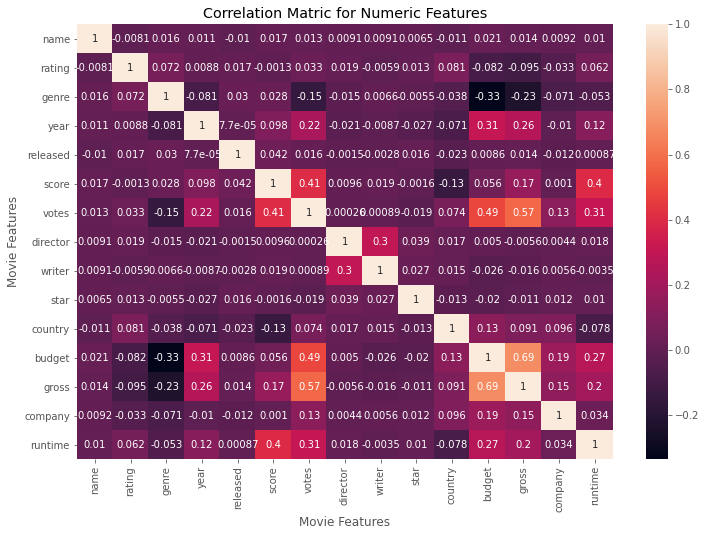

In [25]:
correlation_matrix = dataset_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [26]:
dataset_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.010480  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.017208 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.030429  0.027965   
year      0.011453  0.008779 -0.081261  1.000000  0.000077  0.097995   
released -0.010480  0.017208  0.030429  0.000077  1.000000  0.042148   
score     0.017097 -0.001314  0.027965  0.097995  0.042148  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.016154  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001526  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002784  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015805 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.023408 -0.133348   
budget    0.020548 -0.081939 -0.334021  0.309212  0.008552  0.055665   
gross     0.013895 -0.095355 -0.229534  0.256331  0.013741  0.169406   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.012269  0.001030   
runtime   0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   

             votes  director    writer      star   country    budget  \
name      0.013088  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released  0.016154 -0.001526 -0.002784  0.015805 -0.023408  0.008552   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.486862   
director  0.000260  1.000000  0.299067  0.039234  0.017490  0.004976   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.025911   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget    0.486862  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross     0.573889 -0.005615 -0.015602 -0.010628  0.091404  0.687124   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.269510   

             gross   company   runtime  
name      0.013895  0.009211  0.010392  
rating   -0.095355 -0.032943  0.062145  
genre    -0.229534 -0.071067 -0.052711  
year      0.256331 -0.010431  0.120811  
released  0.013741 -0.012269  0.000868  
score     0.169406  0.001030  0.399451  
votes     0.573889  0.133204  0.309212  
director -0.005615  0.004404  0.017624  
writer   -0.015602  0.005646 -0.003511  
star     -0.010628  0.012442  0.010174  
country   0.091404  0.095548 -0.078412  
budget    0.687124  0.186474  0.269510  
gross     1.000000  0.148722  0.204177  
company   0.148722  1.000000  0.034402  
runtime   0.204177  0.034402  1.000000

In [31]:
correlation_mat=dataset_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.010480
dtype: float64

In [32]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.334021
genre   budget   -0.334021
gross   genre    -0.229534
genre   gross    -0.229534
votes   genre    -0.145307
dtype: float64

In [33]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
sorted_pairs.head()

budget  genre    -0.334021
genre   budget   -0.334021
gross   genre    -0.229534
genre   gross    -0.229534
votes   genre    -0.145307
dtype: float64

In [30]:
#Votes and budget have the highest correlation to gross earnings
#Company has low correlation 